<a href="https://colab.research.google.com/github/mmartigani/RoadMapIA/blob/main/Regresion_Con_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [2]:
from tensorflow import keras
keras.__version__

'3.8.0'

In [3]:
from tensorflow.keras import datasets

In [4]:
boston_housing = datasets.boston_housing

In [5]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
X_train.shape

(404, 13)

In [7]:
X_test.shape

(102, 13)

In [8]:
boston_housing.load_data()

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [9]:
y_train.shape

(404,)

In [10]:
import pandas as pd
import numpy as np
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


In [11]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [12]:
X_test.shape

(51, 13)

In [13]:
X_val.shape

(51, 13)

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [15]:
network = models.Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741 (2.89 KB)

 Trainable params: 741 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
network.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [19]:
hidden1 = network.layers[1]

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[ 0.3203981 ,  0.1949979 , -0.12569883, -0.14289728,  0.16347164,
        -0.3196002 ,  0.3403166 ,  0.28345406, -0.3337159 , -0.09074351],
       [ 0.175488  ,  0.07645753, -0.24978638,  0.38513076,  0.33484328,
        -0.21825118, -0.1524035 , -0.23576356, -0.0431051 , -0.25539228],
       [-0.34386054, -0.31000412, -0.3248326 , -0.07569316,  0.30178058,
         0.06637347, -0.04725981, -0.13192794,  0.31262952,  0.18470162],
       [-0.24205796,  0.2382713 , -0.11648431,  0.09152091,  0.13856494,
        -0.02377418,  0.00627473, -0.3356853 ,  0.23986673, -0.02466312],
       [-0.3641191 ,  0.34308428,  0.1355992 , -0.35661986, -0.17969987,
        -0.29459873,  0.11609477, -0.20041117,  0.12360209,  0.11337149],
       [ 0.2580992 ,  0.3597411 , -0.11232841, -0.35218778,  0.37899315,
        -0.20888606, -0.04530454, -0.17582597,  0.1262986 , -0.24484882],
       [ 0.25433934,  0.36310595, -0.26109228,  0.20368505, -0.3704775 ,
         0.04614231,  0.23751175,  0.2124247 

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
network.compile(loss='mean_squared_error',optimizer='sgd')

In [24]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

In [25]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=30,
                      validation_data=(X_val_prep, y_val))

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 561.4254 - val_loss: 432.6112
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 395.9020 - val_loss: 291.9716
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 269.7812 - val_loss: 208.0944
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 189.0671 - val_loss: 158.0542
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 124.3808 - val_loss: 127.5895
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 120.6442 - val_loss: 110.1695
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 105.0361 - val_loss: 99.6363
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 108.2559 - val_loss: 93.0614
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 103.9117 - val_loss: 85.9577
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 84.1828 - val_loss: 75.2862
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 79.2825 - val_loss: 75.4956
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━

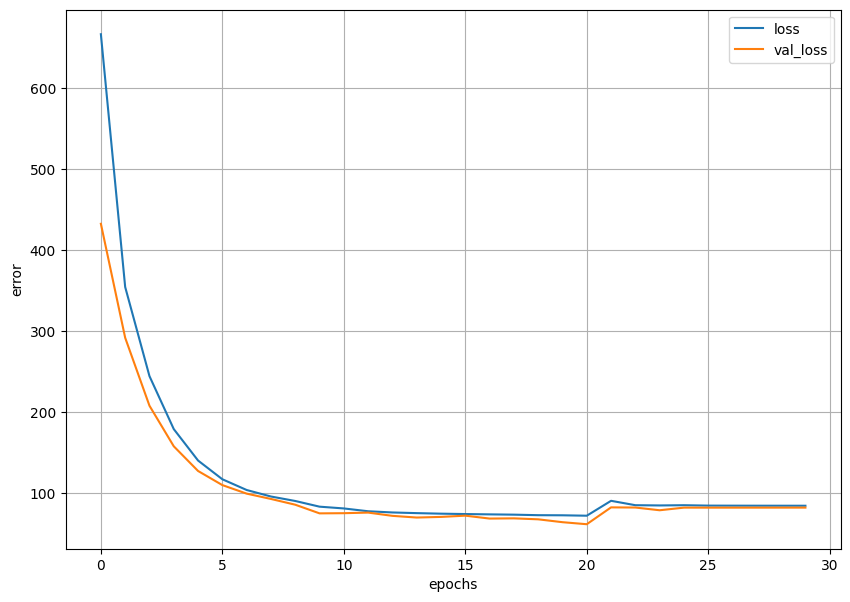

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

In [27]:
test_loss = network.evaluate(X_test_prep, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 95.5556 


In [28]:
print('test_mse:', test_loss)

test_mse: 84.78019714355469


In [29]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test[23]

In [30]:
# Representación gráfica del nuevo ejemplo que queremos predecir
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df_new = pd.DataFrame([X_new], columns=features[:-1])
df_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72


In [31]:
# Preprocesamos el nuevo ejemplo que queremos predecir
X_new_prep = scaler.transform(df_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [32]:
# Relizamos la prediccion
y_predict = network.predict(X_new_prep)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [33]:
y_predict

array([[22.496527]], dtype=float32)

In [34]:
y_predict.round(2)

array([[22.5]], dtype=float32)

In [35]:
# Comparamos la predicción con el valor original
print("Predicción:", y_predict.round(2))
print("Valor original:", y_test[23])

Predicción: [[22.5]]
Valor original: 24.2
